# Likelihood encoding benchmark

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
main_path = '../../'
sys.path.append(main_path + 'codes/auto_ml')
sys.path.append(main_path + 'codes/processing')
sys.path.append(main_path + 'codes/models')
sys.path.append(main_path + 'data')

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv(main_path + 'data/mimic/final_df.csv')

In [4]:
X = data.drop(['DIED'], axis=1)
y = pd.DataFrame(data['DIED'])

In [5]:
# Normalization available = standard.
normalization = ['standard']
# Encoding available = label, one-hot, likelihood.
encoding = ['none', 'label', 'one-hot', 'likelihood']

In [6]:
from preprocessing import preprocess

def process_and_split(X, y, normalization, encoding):
    print('Processing with', nrm, 'normalization and', ecd, 'encoding...')
    X_preprocessed = preprocess(X, normalization, encoding).values
    y_preprocessed = preprocess(y, 'none', 'label').values.reshape(-1, 1)
    
    print('X shape: ', X_preprocessed.shape)
    print('y shape: ', y_preprocessed.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_preprocessed, train_size=0.7, test_size=0.3)
    
    return X_train, X_test, y_train, y_test

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from itertools import product
import time

for nrm, ecd in product(normalization, encoding):
    X_train, X_test, y_train, y_test = process_and_split(X, y, nrm, ecd)
    y_train, y_test = np.ravel(y_train), np.ravel(y_test)
    
    reg = LogisticRegression()
    
    print('Training model...')

    t1 = time.time()
    reg.fit(X_train, y_train)
    t2 = time.time()
    
    print('Model trained in ', t2-t1, 's.')

    print('Train accuracy: ', accuracy_score(np.round(reg.predict(X_train)), y_train))
    print('Test accuracy: ', accuracy_score(np.round(reg.predict(X_test)), y_test))
    print('\n')

Processing with standard normalization and none encoding...
X shape:  (26927, 1062)
y shape:  (26927, 1)
Training model...
Model trained in  1.5052640438079834 s.
Train accuracy:  0.9380305602716469
Test accuracy:  0.9270949374922639


Processing with standard normalization and label encoding...
X shape:  (26927, 1068)
y shape:  (26927, 1)
Training model...
Model trained in  2.603368043899536 s.
Train accuracy:  0.938508064516129
Test accuracy:  0.930313157569006


Processing with standard normalization and one-hot encoding...
X shape:  (26927, 1211)
y shape:  (26927, 1)
Training model...
Model trained in  1.7139930725097656 s.
Train accuracy:  0.9395161290322581
Test accuracy:  0.9314271568263399


Processing with standard normalization and likelihood encoding...
X shape:  (26927, 1068)
y shape:  (26927, 1)
Training model...
Model trained in  2.357759952545166 s.
Train accuracy:  0.9377122241086587
Test accuracy:  0.9320460453026365




Processing with standard normalization and none encoding...
X shape:  (26927, 1062)
y shape:  (26927, 1)
Training model...
Training finished in 13.034603834152222 s. 

Processing with standard normalization and label encoding...
X shape:  (26927, 1068)
y shape:  (26927, 1)
Training model...
Training finished in 13.311700105667114 s. 

Processing with standard normalization and one-hot encoding...
X shape:  (26927, 1211)
y shape:  (26927, 1)
Training model...
Training finished in 15.915838956832886 s. 

Processing with standard normalization and likelihood encoding...
X shape:  (26927, 1068)
y shape:  (26927, 1)
Training model...
Training finished in 12.293620109558105 s. 



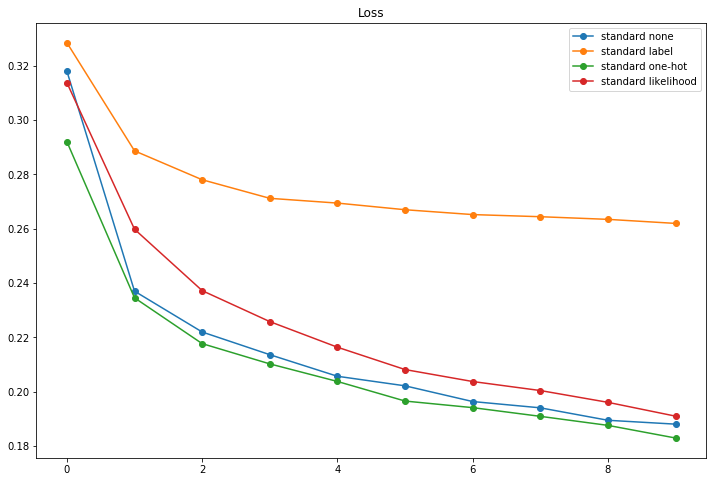

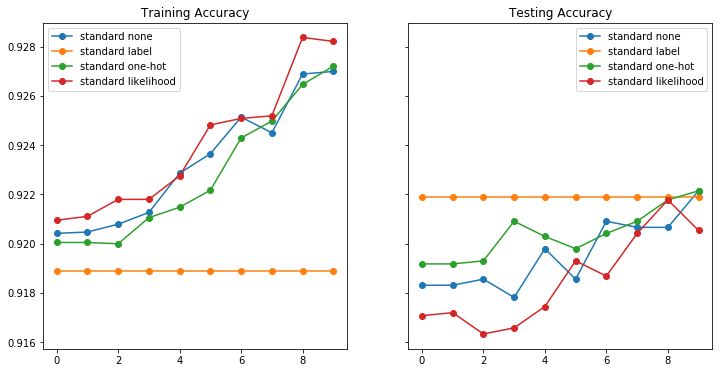

In [9]:
import matplotlib.pyplot as plt
import run_model_torch
import time
from itertools import product
from sklearn.model_selection import train_test_split

fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))
fig2, ax2 = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for nrm, ecd in product(normalization, encoding):
    X_train, X_test, y_train, y_test = process_and_split(X, y, nrm, ecd)
    
    print('Training model...')
    
    t1 = time.time()
    losses, train_acc, test_acc = run_model_torch.training(X_train, y_train, X_test, y_test)
    t2 = time.time()
    
    print('Training finished in', t2-t1, 's. \n')
    
    ax1.plot(losses, 'o-', label=nrm + ' ' +  ecd)
    ax2[0].plot(train_acc, 'o-', label=nrm + ' ' +  ecd)
    ax2[1].plot(test_acc, 'o-', label=nrm + ' ' +  ecd)
    
ax1.legend()
ax1.set_title('Loss')
ax2[0].legend()
ax2[0].set_title('Training Accuracy')
ax2[1].legend()
ax2[1].set_title('Testing Accuracy')
plt.show()